Nama : Diaz Islami <br>
NIM : A11. 2020.13116 <br>
Kelas : BKDS02 <br>

# 1) Pengumpulan Data
Dataset diperoleh dengan mengunduh dari [link berikut](https://archive.ics.uci.edu/dataset/45/heart+disease).
Dataset tersebut merupakan dataset mengenai diagnosa penyakit jantung yang memiliki 76 atribut yang disajikan dalam format dengan nama "hungarian.data". Dataset ini telah dikoleksi dari lokasi Hungarian Institute of Cardiology, Budapest (hungarian.data)


# 2) Menelaah Data

In [1]:
import pandas as pd
import numpy as np
import re
import itertools

## Load Data
Lokasi dataset disimpan dalam variabel "dir"

In [2]:
dir = "/content/hungarian.data"

In [3]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

In [4]:
lines[:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [5]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

In [6]:
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [8]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

Mengubah tipe data file dataset menjadi tipe data float dengan tujuan agar sesuai dengan nilai null yaitu -9.0. Selain dari itu, mengubah tipe data ini juga bertujuan agar seluruh tipe data dalam dataset beragam dan memudahkan dalam proses menelaah data.

In [9]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# 3) Validasi Data
Tahap validasi data dilakukan dengan tujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya. Dalam tahap ini, hal pertama yang dilakukan adalah mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset yang mana menjelaskan bahwa data dengan nilai -9.0 merupakan nilai null (kosong) yang mana menjelaskan suatu kondisi dari ketidaklengkapan data (dapat berupa missing value).

In [10]:
df.replace(-9.0, np.nan, inplace=True)

In [11]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [12]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

Dari program "df.info()" dapat dilihat bahwa tidak sedikit dari beberapa atribut yang memiliki data bernilai null

# 4) Menentukan Object Data
Tahap ini bertujuan untuk menyelekasi sekaligus memilih fitur apa saja yang akan digunakan. Berdasarkan dari penjelasan pada dataset, bahwa terdapat 14 fitur yang akan digunakan.

In [14]:
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [15]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Kemudian, setelah memilih fitur yang akan digunakan, langkah berikutnya ialah mengganti nama kolom sesuai dengan 14 nama kolom yang tertera pada deskripsi dataset. Di bawah ini merupakan langkah untuk mengubah nama kolom tersebut:

In [16]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-16-b484e5bfe3ce>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [17]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


menghitung jumlah fitur pada datset

In [18]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

# 5) Membersihkan Data
Membersihkan data bertujuan agar data menjadi lebih rapi atau "layak" untuk bisa dilanjutkan pada tahap pelatihan model, yang mana diketahui bahwa bagaimana model menghasilkan output yang baik dan akurat juga dipengaruhi seberapa baik data yang dimasukkan dalam proses pelatihan.

Sebelum membersihkan data, hitung terlebih dahulu jumlah missing value dari fitur pada data yang digunakan.

In [19]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Berdasarkan output kode program diatas ada beberapa fitur yang hampir 90% datanya memiliki nilai null sehingga perlu dilakukan penghapusan fitur menggunakan fungsi drop. Beberapa fitur tersebut diantaranya: **ca, slope, thal**

In [20]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns=columns_to_drop, axis=1)

In [21]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dikarenakan masih terdapat missing value atau nilai null pada beberapa kolom fitur, maka akan dilakukan pengisian atau penggantian nilai null menggunakan nilai mean di setiap kolomnya. Pengisian atau penggantian nilai null dengan nilai mean dikarenakan data pada fitur tersebut merupakan data numerik. Jika data tersebut merupakan data kategorik, maka penggantian atau pengisian nilai null akan menggunakan nilai modus dari data pada fitur tersebut.

In [22]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanRestCG = meanRestCG.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)

meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [23]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
               'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [24]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [25]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Mengecek duplikasi data dalam data yang digunakan.

In [26]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [27]:
print("All Duplcate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplcate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data yang memiliki duplikat

In [28]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [29]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [30]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

Langkah berikutnya ialah mencari korelasi antar fitur, yang mana langkah ini bertujuan untuk mengetahui keterkaitan atau hubungan antar fitur.

In [32]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


Untuk mengetahui korelasi antar fitur, di bawah tampilan visualisasi antar fitur untuk memudahkan dalam memahami data.

<Axes: >

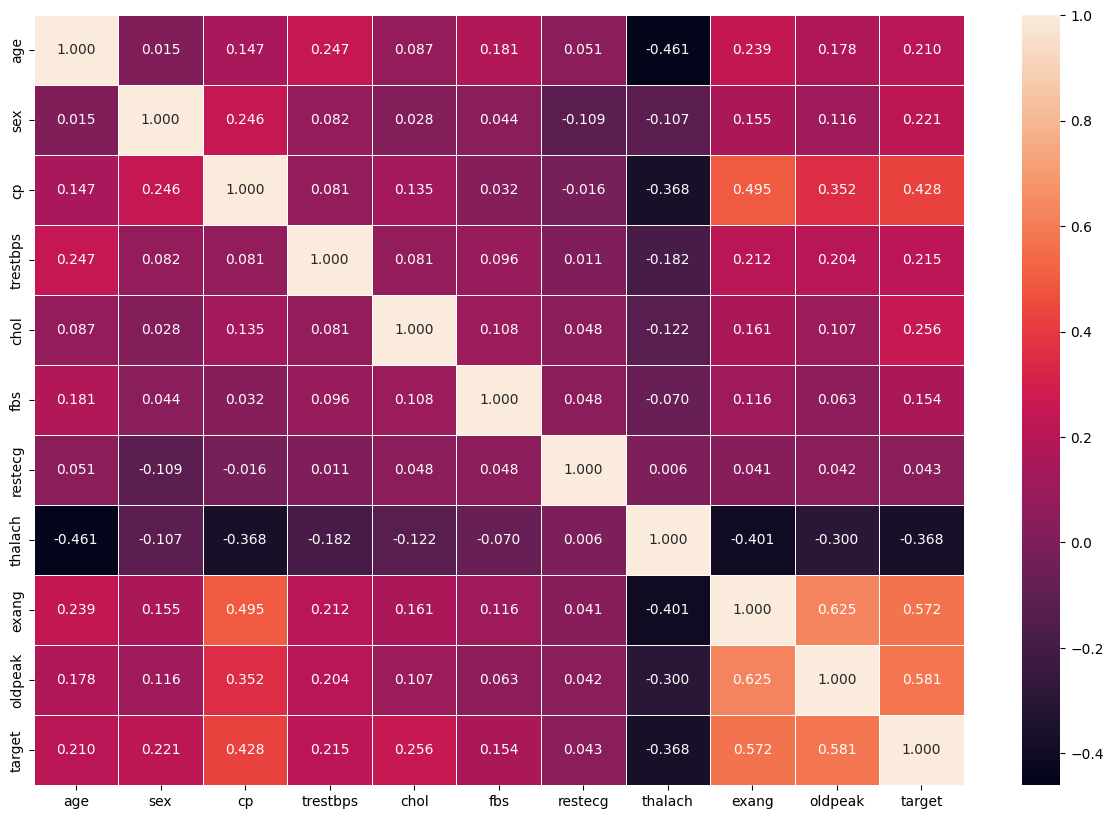

In [33]:
cor_mat = dfClean.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f")

# 6) Konstruksi Data
Dalam tahap ini konstruksi data memiliki tujuan yang salah satunya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Akan tetapi, pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian data kembali. Pada tahap ini, tidak hanya penyesuaian data yang dilakukan, penyeimbangan distribusi data dan transformasi data dilakukan setelah melakukan pengecekan data jika distribusi data dalam kondisi yang tidak seimbang dan jika memiliki rentang nilai yang cukup jauh.

In [34]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [35]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah penyesuaian tipe dataset telah dilakukan, maka tinggal memisahkan antara fitur dan target lalu simpan kedalam variabel. Pemisahan dilakukan dengan bertujuan akan dilakukan penyeimbangan distribusi data jika saat dicek kondisi dari dataset pada bagian fitur tidak mengalami skewness.

In [36]:
X = dfClean.drop("target", axis=1).values
y = dfClean.iloc[:, -1]

Pada tahap ini, dilakukan pengecekan persebaran dari distribusi data setelah melakukan pemisahan antara fitur dan target dengan cara melihatnya melalui visualisasi data dengan diagram batang.

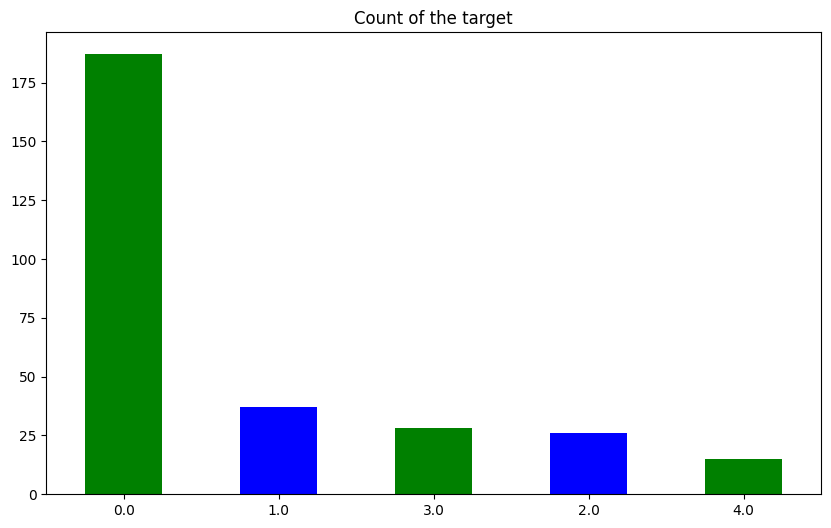

In [37]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Dari grafik visualisasi data, terlihat bahwa data mengalami **skewness**, sehingga perlu dilakukan penyeimbangan data. Karena diketahui bahwa jumlah antar data begitu signifikan, yang mana berarti pada beberapa data memiliki jumlah data yang terlalu sedikit dibandingkan satu data tertentu maka perlu dilakukan teknik **oversampling**. Namun, apabila pada jumlah data pada bebrapa data terlalu banyak dibanding satu data tertentu, maka perlu dilakukan teknik undersampling.

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
# oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X,y)

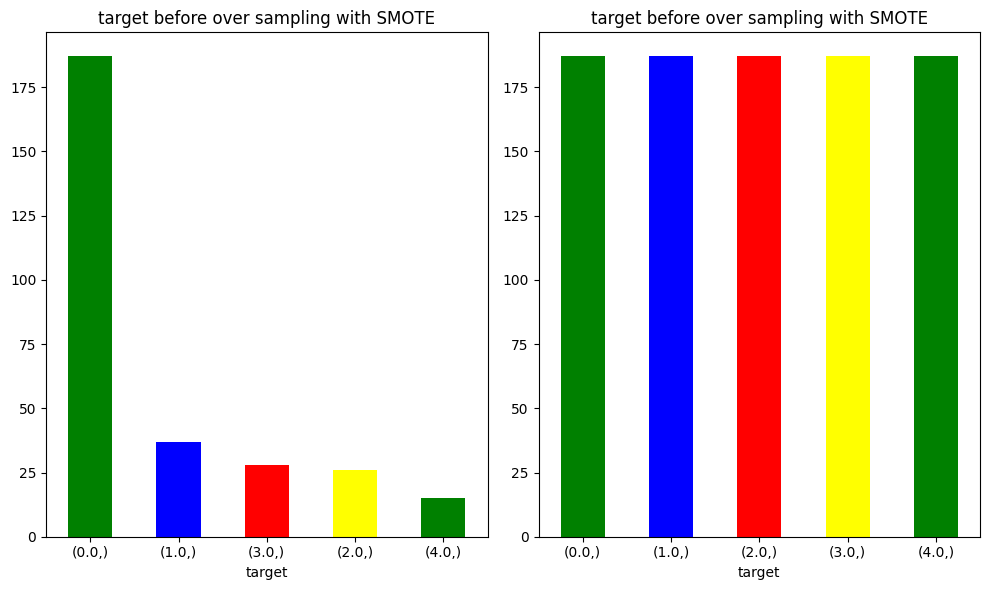

In [40]:
# visualisasi data perbandingan sebelum dan sesudah oversampling
plt.figure(figsize=(12,4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target before over sampling with SMOTE")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
new_df2  =pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target before over sampling with SMOTE")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Pada grafik di atas dapat dilihat perbandingan jumlah data ketika target belum di seimbangkan dan sudah diseimbangkan menggunakan oversampling. Dapat dikatakan bahwa kondisi distribusi persebaran data telah optimal yang mana dapat dilanjutkan untuk tahap berikutnya.

In [41]:
new_df1=pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [42]:
# over sampling
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Setelah penyeimbangan persebaran jumlah target, kita akan melakukan pengecekan apakah perlu dilakukan normalisasi/standarisasi (transformasi data) pada dataset kita.

In [43]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi di atas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

In [44]:
# normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

len(X_smote_resampled_normal)

935

In [45]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya adalah membagi fitur dan target menjadi data train dan test yang diperlukan pada tahap modelling.

In [46]:
from sklearn.model_selection import train_test_split

# membagi fitur dan target menjadi data train dan data test (untuk oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample  normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# 7) Model

Tahap ini merupakan tahap untuk membangun sebuah model. Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi
ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional. Pada tahap ini juga, akan dilakukan pembangunan beberapa model guna untuk mengetahui performa terbaik mana dari model yang dibangun.

In [47]:
from sklearn.metrics import accuracy_score, recall_score,f1_score, precision_score, confusion_matrix

def evaluation(Y_test, Y_pred):
  acc = accuracy_score(Y_test, Y_pred)
  rcl = recall_score(Y_test, Y_pred, average = 'weighted')
  f1 = f1_score(Y_test, Y_pred, average = 'weighted')
  ps = precision_score(Y_test, Y_pred, average = 'weighted')

  metric_dict = {'accuracy': round(acc,3),
                 'recall': round(rcl,3),
                 'precision': round(ps, 3),
                 'F1-score': round(f1, 3)}

  return print(metric_dict)

## Oversample
Pada tahap ini dilakukan modelling dengan menggunakan data yang telah dilakukan oversampling dengan SMOTE yang dilakukan sebelumnya

### KNN

Pada tahap ini kita akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.

In [48]:
# import library model dan evaluasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [49]:
# membangun dan training model KNN
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Di bawah ini merupakan hasil akurasi beserta hasil evaluasi dari nilai precision, recall, dan f1-score dengan algoritma KNN.

In [50]:
# melakukan testing dari model yang telah dilatih
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [51]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'precision': 0.863, 'F1-score': 0.861}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

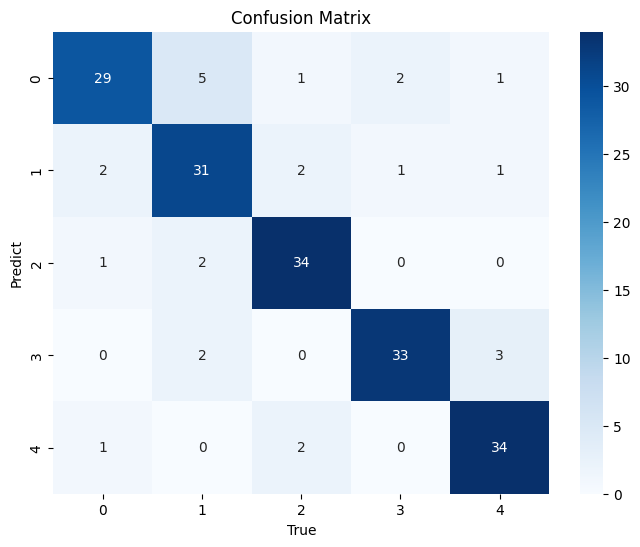

In [52]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

Selanjutnya membangun model dengan algoritma random forest dengan n_estimators yaitu 100, yang mana n_estimators berguna untuk mengatur jumlah pohon keputusan yang akan dibangun.

In [53]:
# membangun dan training model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [55]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'precision': 0.922, 'F1-score': 0.92}


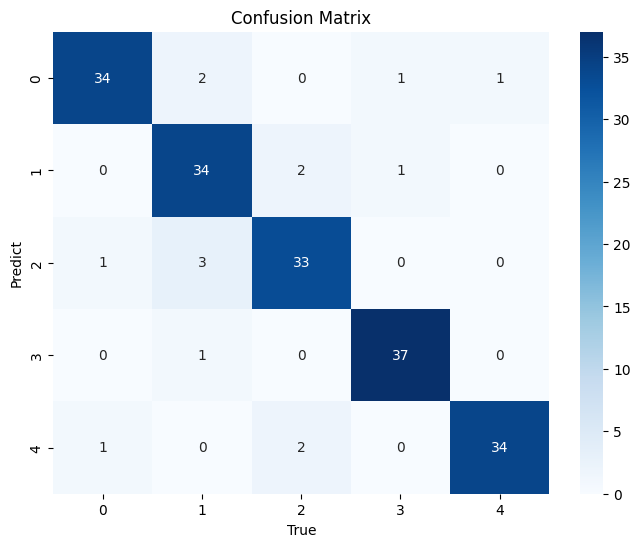

In [56]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost
Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [57]:
# membangun dan training model XGBoost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
y_pred_xgb = xgb_model.predict(X_test)

In [59]:
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [60]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'precision': 0.906, 'F1-score': 0.904}


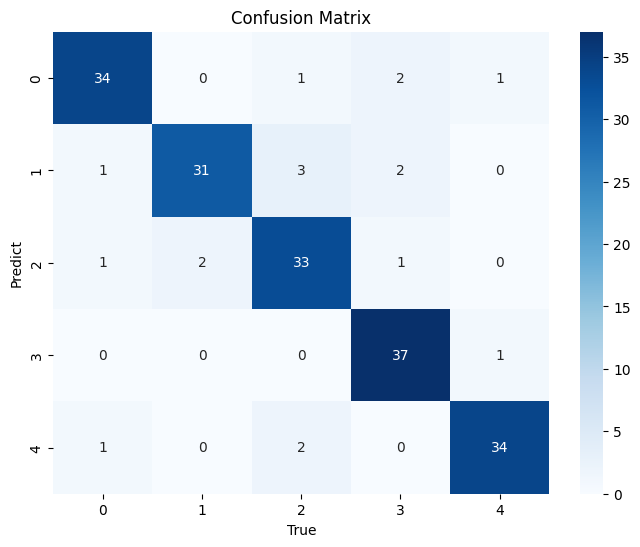

In [61]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Oversample + Normalisasi
Bagian ini akan dibuat sebuah model yang dimana data yang dipakai kali ini adalah data yang telah dilakukan oversample dan normalisasi. Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada masing-masing model.

### KNN

Tahap ini berfokus pada pembuatan model dan training data dengan KNN.

In [62]:
# import library model dan evaluasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [63]:
# membangun dan training model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred_knn = knn_model.predict(X_test_normal)

In [65]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [66]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'precision': 0.863, 'F1-score': 0.861}


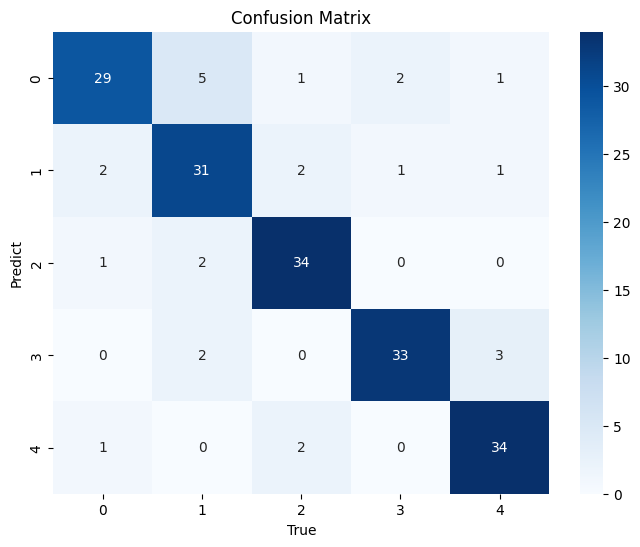

In [67]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [68]:
# membangun dan training model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [69]:
y_pred_rf = rf_model.predict(X_test_normal)

In [70]:
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [71]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'precision': 0.922, 'F1-score': 0.92}


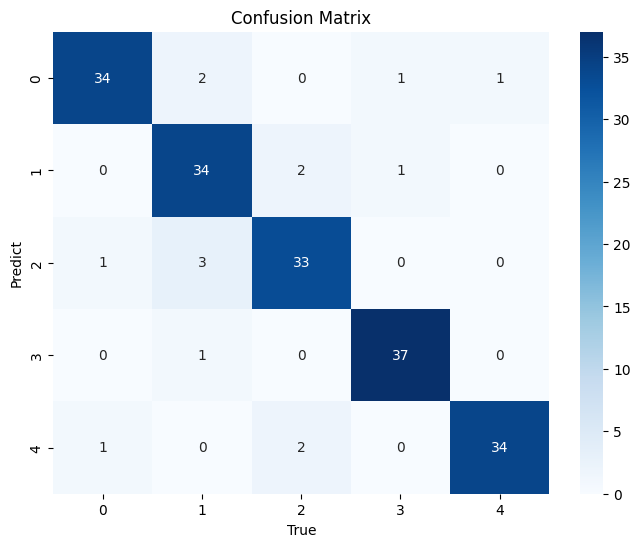

In [72]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBOOST

In [73]:
# membangun dan training model XGBoost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [75]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'precision': 0.906, 'F1-score': 0.904}


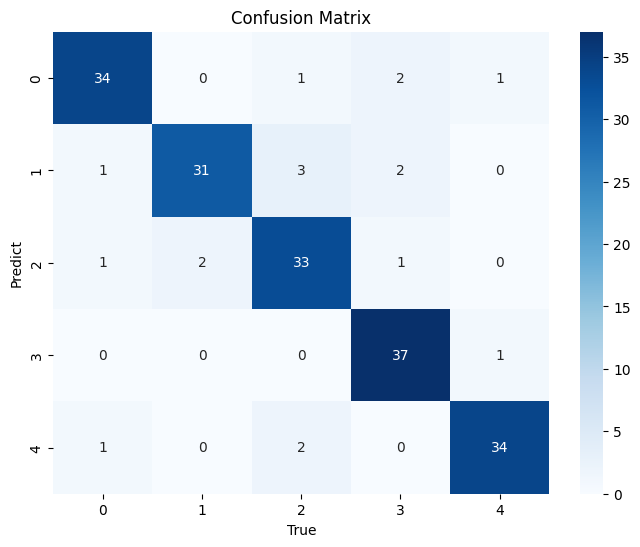

In [76]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Tunning + Normalization + Oversample
Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan adalah data yang sudah dilakukan Tunning Parameter, Normalisasi, dan Oversample.

### KNN

Tahap ini melakukan modelling dan training dengan model KNN

In [77]:
# import library model dan evaluasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Hyperparameter yang dimiliki setiap model berbeda-beda sehingga setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [78]:
# membangun model KNN
knn_model = KNeighborsClassifier()

In [79]:
# tunning parameter model KNN
param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

In [80]:
# mencari hyperparameter terbaik dengan RandomizedSearchCV
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

In [81]:
# melatih data dengan model KNN
knn_model.fit(X_train_normal, y_train_normal)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': range(10, 61),
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': range(3, 21),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [82]:
# menampilkan hyperparameter terbaik dari model KNN
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 51, 'algorithm': 'ball_tree'}


In [83]:
y_pred_knn = knn_model.predict(X_test_normal)

In [84]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [85]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'precision': 0.923, 'F1-score': 0.92}


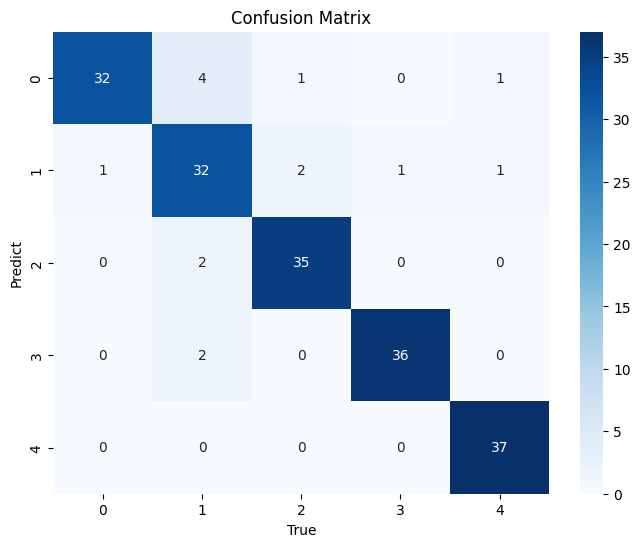

In [86]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [87]:
# membangun model Random Forest
rf_model = RandomForestClassifier()

In [88]:
# tunning parameter model Random Forest
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}

In [89]:
# mencari hyperparameter terbaik dengan RandomizedSearchCV
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

In [90]:
# melatih data dengan model Random Forest
rf_model.fit(X_train_normal, y_train_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]})

In [91]:
# menampilkan hyperparameter terbaik dari model
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [92]:
y_pred_rf = rf_model.predict(X_test_normal)

In [93]:
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.91      0.86      0.89        37
         2.0       0.83      0.92      0.87        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [94]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'precision': 0.917, 'F1-score': 0.915}


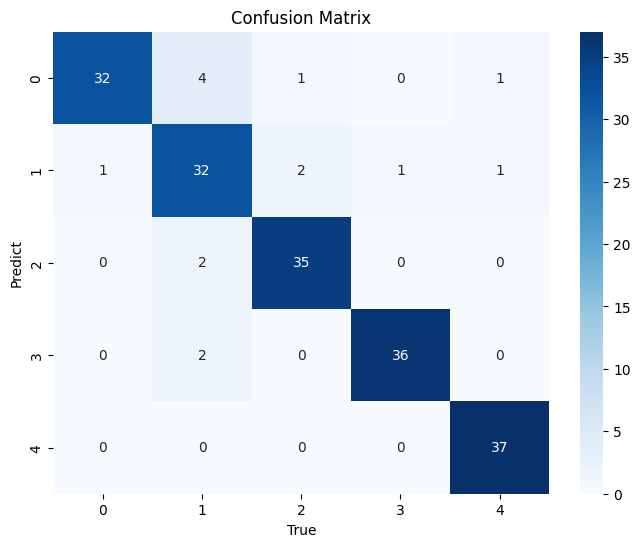

In [95]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBOOST

In [96]:
# membangun model XGBoost
xgb_model = XGBClassifier()

In [97]:
# tunning parameter model XGBoost
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

In [98]:
# mencari hyperparameter terbaik dengan RandomizedSearchCV
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

In [99]:
# melatih data dengan model
xgb_model.fit(X_train_normal, y_train_normal)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]})

In [100]:
# menampilkan hyperparameter terbaik dari model
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [101]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [102]:
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.84      0.87        37
         2.0       0.89      0.89      0.89        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [103]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.914, 'recall': 0.914, 'precision': 0.915, 'F1-score': 0.914}


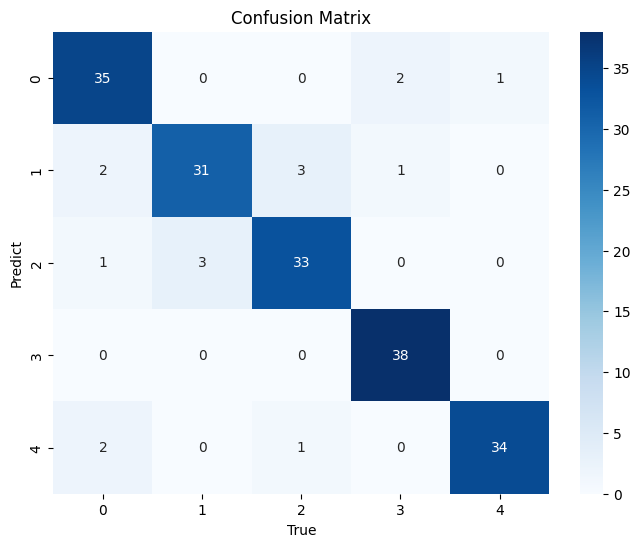

In [104]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# 8) Evaluasi
Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

In [105]:
import matplotlib.pyplot as plt

In [106]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
                                                               accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


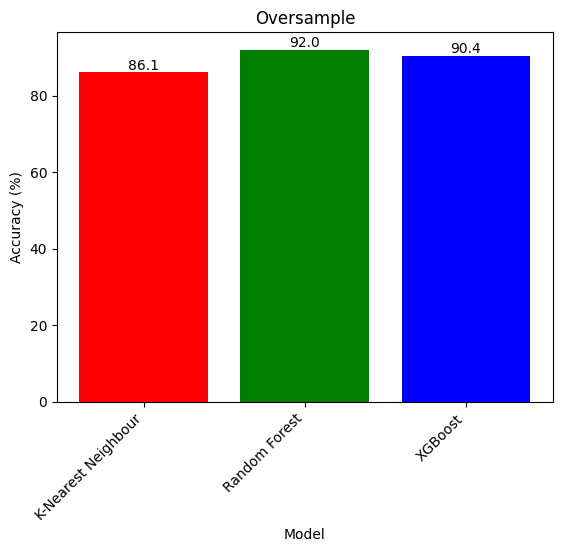

In [107]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [108]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
                                                               accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


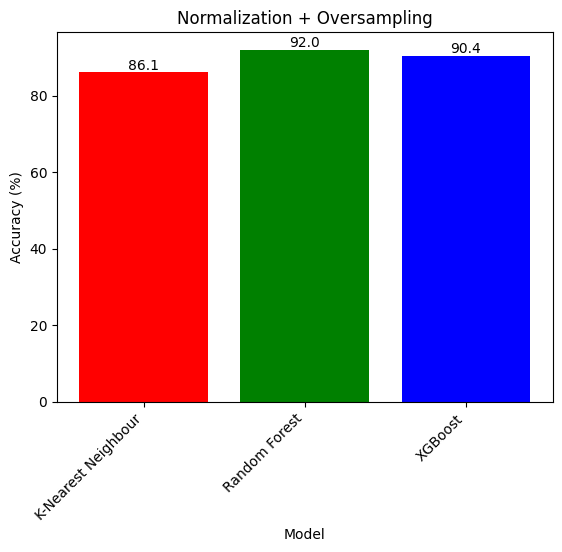

In [109]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [110]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                                                               accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,91.4
2,XGBoost,91.4


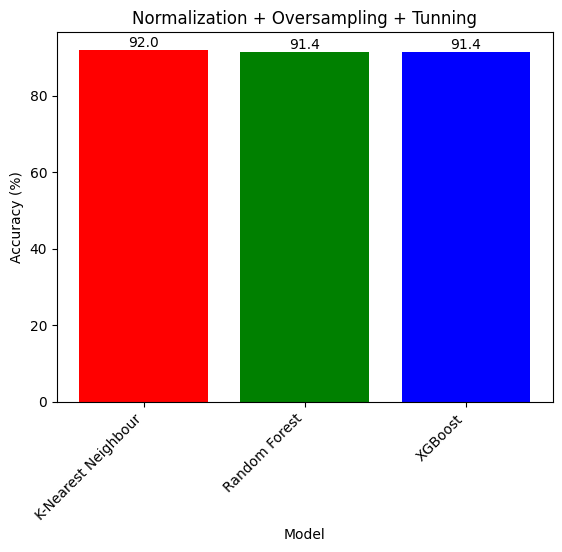

In [111]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [112]:
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
              'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
                 accuracy_xgb_smote_normal_Tun*100]
})

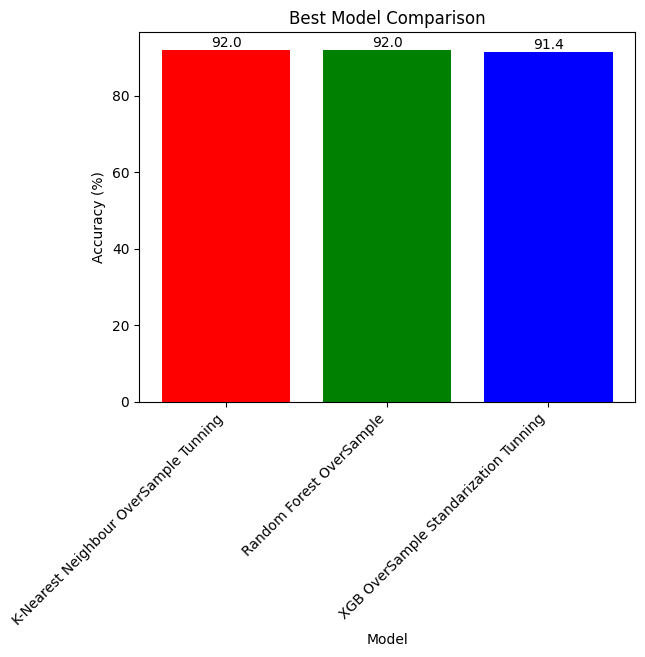

In [113]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# 9) Kesimpulan

Dari penelitian diatas setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost dengan berbagai penanganan data antara lain menggunakan random over sampling SMOTE untuk penanganan imbalance data, RandomSearchCV untuk tunning, dan Normalisasi data. Dapat disimpulkan bahwa klasifikasi menggunakan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 86.1 %, model Random Forest dengan akurasi yang dihasilkan yaitu 92%, dan model XGBoots menghasilkan akurasi 90.4%. Disamping itu bila klasifikasi menggunakan data yang sudah dilakukan normalisasi dan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 86.1%, model Random Forest menghasilkan akurasi 92%, dan model XGBoots menghasilkan akurasi 90.4%. Dan pada klasifikasi menggunakan data yang telah dilakukan tunning RandomSearchCV, normalisasi, dan Random Over Sampling SMOTE dalam model KNN menghasilkan akurasi 92%, pada model Random Forest menghasilkan akurasi 91.4%. dan model XGBoots menghasilkan akurasi 91.4%. Dikarenakan hal itu, dalam penanganan data yang optimal untuk mengatasi ketidakseimbangan data adalah dengan menggunakan metode random Oversampling SMOTE sekaligus yang dilengkapi dengan tuning menggunakan RandomSearchCV dan normalisasi data, memberikan hasil yang signifikan dalam meningkatkan akurasi model klasifikasi khususnya pada model KNN dan XGBoots, namun hal itu tidak terjadi pada model Random Forest yang mengalami penurunan sedikit akurasi. Secara keseluruhan, penanganan dalam ketidakseimbangan data dengan menggunakan tunning parameter, normalisasi, dan oversampling dapat memberikan dampak signifikan terhadap performa model klasifikasi. Pemilihan model terbaik dan parameter optimal dapat meningkatkan akurasi dan kinerja model secara keseluruhan. Pada penanganan data yang optimal dengan Random Over Sampling SMOTE dan normalisasi pun bisa dilihat bahwa hasil yang didapat tidak mempengaruhi akurasi jika dibandingkan dengan hanya menggunakan Random Over Sampling SMOTE untuk penanganan data yang optimal.

# 10) Pengembangan (Uji Coba)

Tahap ini melakukan modelling dengan SVM

## Oversampling

In [114]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [115]:
y_pred_svm = svm_model.predict(X_test)

In [116]:
# Evaluate the SVM model
print("Support Vector Machine (SVM) Model:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Model:
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79        38
         1.0       0.52      0.73      0.61        37
         2.0       0.51      0.68      0.58        37
         3.0       0.74      0.37      0.49        38
         4.0       0.68      0.62      0.65        37

    accuracy                           0.63       187
   macro avg       0.66      0.63      0.62       187
weighted avg       0.66      0.63      0.62       187



In [117]:
evaluation(y_test,y_pred_svm)

{'accuracy': 0.626, 'recall': 0.626, 'precision': 0.66, 'F1-score': 0.623}


In [118]:
cm = confusion_matrix(y_test, y_pred_svm)

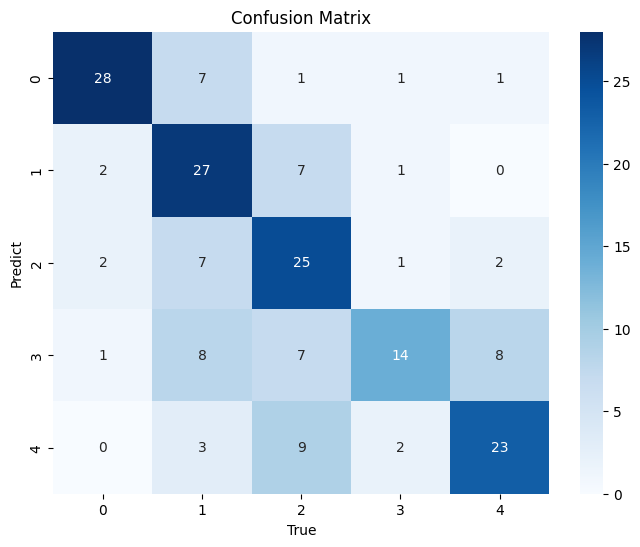

In [119]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Oversampling + Normalisasi

In [120]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_normal, y_train_normal)

SVC()

In [121]:
y_pred_svm = svm_model.predict(X_test_normal)

In [122]:
# Evaluate the SVM model
print("Support Vector Machine (SVM) Model:")
print(classification_report(y_test_normal, y_pred_svm))

Support Vector Machine (SVM) Model:
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79        38
         1.0       0.52      0.73      0.61        37
         2.0       0.51      0.68      0.58        37
         3.0       0.74      0.37      0.49        38
         4.0       0.68      0.62      0.65        37

    accuracy                           0.63       187
   macro avg       0.66      0.63      0.62       187
weighted avg       0.66      0.63      0.62       187



In [123]:
evaluation(y_test_normal,y_pred_svm)

{'accuracy': 0.626, 'recall': 0.626, 'precision': 0.66, 'F1-score': 0.623}


In [124]:
cm = confusion_matrix(y_test_normal, y_pred_svm)

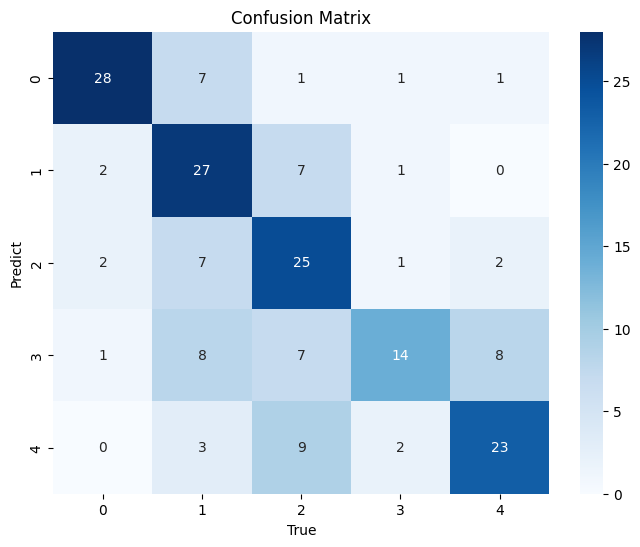

In [125]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Oversampling + Normalisasi + Tunning Hyperparameter

Tunning hyperparameter dilakukan dengan menggunakan GridSearchCV

In [126]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [127]:
svm_model = SVC()

In [128]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [129]:
svm_model = grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [130]:
svm_model.fit(X_train_normal, y_train_normal)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.540 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.564 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.597 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.460 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.577 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.360 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [131]:
best_params = svm_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [132]:
y_pred_svm = svm_model.predict(X_test_normal)

In [133]:
# Evaluate the SVM model
print("Support Vector Machine (SVM) Model:")
print(classification_report(y_test_normal, y_pred_svm))

Support Vector Machine (SVM) Model:
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80        38
         1.0       0.76      0.86      0.81        37
         2.0       0.79      0.89      0.84        37
         3.0       0.94      0.87      0.90        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [134]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test_normal,y_pred_svm)

{'accuracy': 0.856, 'recall': 0.856, 'precision': 0.862, 'F1-score': 0.856}


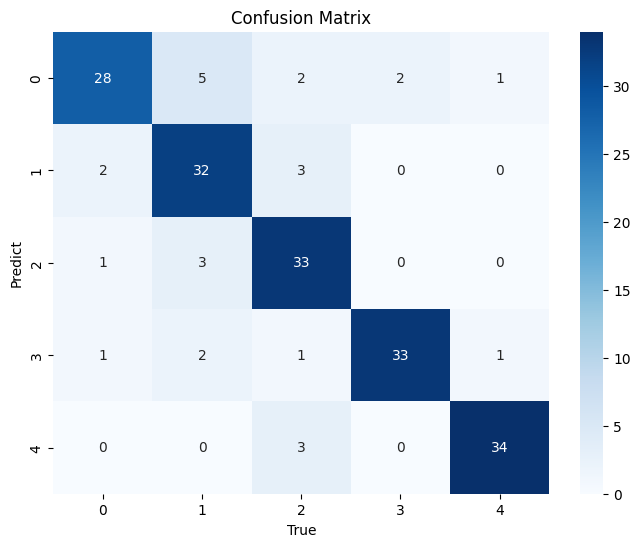

In [135]:
cm = confusion_matrix(y_test_normal, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Kesimpulan
Dari hasil modelling menggunakan algoritma SVM, didapatkan hasil terbaik pada model SVM dengan teknik oversampling + normalisasi + tunning hyperparameter dengan hasil nilai akurasi sebesar 85,6%